# Brief Description of the project

The purpose of conducting this project is to ascertain if good governance and ease of doing business in a country have a relationship with the amount of investment it receives both domestic and foreign. I chose three countries, which are New Zealand, South Africa and Eritrea. The reason I choose these three countries is that for governance and ease of doing business, New Zealand ranks on the upper spectrum, South Africa is in the middle and Eritrea is on the lower end of these rankings, so with this, I thought it would provide a more realistic picture if there is a relationship with investment. Regression Analysis using the train test model will be the method chosen to conduct this statistical analysis.


In [60]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
sns.set_style('white')
pd.options.display.float_format = '{:,.3f}'.format
plt.rcParams.update({'figure.figsize':(15,10), 'figure.dpi':100})

# Data Cleaning

In [2]:
df_adv_eco_gdp = pd.read_csv('WEO_Data Advance economies GDP.csv')
df_adv_eco_gdp.head()

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,1980,1981,1982,1983,1984,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Estimates Start After
0,Australia,"Gross domestic product, current prices",U.S. dollars,Billions,"See notes for: Gross domestic product, curren...",162.628,188.067,186.709,179.151,196.777,...,"1,569.32","1,518.43","1,457.39","1,234.82","1,266.27","1,385.19","1,421.30","1,391.54","1,359.33","2,020.000"
1,Austria,"Gross domestic product, current prices",U.S. dollars,Billions,"See notes for: Gross domestic product, curren...",80.923,70.121,70.111,71.032,67.007,...,409.661,430.197,442.699,382.01,395.728,417.091,455.301,445.125,428.622,"2,019.000"
2,Belgium,"Gross domestic product, current prices",U.S. dollars,Billions,"See notes for: Gross domestic product, curren...",123.478,102.245,89.958,85.037,81.237,...,496.467,521.799,535.529,462.383,475.931,502.521,543.98,533.157,513.087,"2,020.000"
3,Canada,"Gross domestic product, current prices",U.S. dollars,Billions,"See notes for: Gross domestic product, curren...",276.035,307.246,314.639,341.863,356.728,...,"1,828.36","1,846.60","1,805.75","1,556.51","1,528.00","1,649.27","1,721.82","1,741.58","1,643.41","2,020.000"
4,Cyprus,"Gross domestic product, current prices",U.S. dollars,Billions,"See notes for: Gross domestic product, curren...",2.314,2.242,2.319,2.321,2.447,...,24.993,23.9,23.162,19.844,20.947,22.721,25.322,24.953,23.967,"2,020.000"


In [3]:
#Filtering data only what data for New Zealand
df_NewZealand_gdp = df_adv_eco_gdp.iloc[25]
print(df_NewZealand_gdp[:8])
print(type(df_NewZealand_gdp))

Country                                                                New Zealand
Subject Descriptor                          Gross domestic product, current prices
Units                                                                 U.S. dollars
Scale                                                                     Billions
Country/Series-specific Notes    See notes for:  Gross domestic product, curren...
1980                                                                         22.52
1981                                                                        23.439
1982                                                                        23.205
Name: 25, dtype: object
<class 'pandas.core.series.Series'>


In [4]:
#Converting pandas series to a dataframe
df_NewZealand_gdp_2 = pd.DataFrame(df_NewZealand_gdp)
print(df_NewZealand_gdp_2[:8])
print(type(df_NewZealand_gdp_2))

                                                                              25
Country                                                              New Zealand
Subject Descriptor                        Gross domestic product, current prices
Units                                                               U.S. dollars
Scale                                                                   Billions
Country/Series-specific Notes  See notes for:  Gross domestic product, curren...
1980                                                                       22.52
1981                                                                      23.439
1982                                                                      23.205
<class 'pandas.core.frame.DataFrame'>


In [5]:
#Dropping unnecessary rows cleaning the data
df_NewZealand_gdp_3 = df_NewZealand_gdp_2.drop(['Country', 
                                                'Subject Descriptor', 
                                                'Units','Scale', 
                                                'Country/Series-specific Notes',
                                                'Estimates Start After'], axis = 0)

#Renaming colums
df_NewZealand_gdp_4 = df_NewZealand_gdp_3.rename(columns = {25:'New Zealand (GDP, Current Prices - USD Billions)'})
df_NewZealand_gdp_4.head()

,"New Zealand (GDP, Current Prices - USD Billions)"
1980,22.52
1981,23.439
1982,23.205
1983,22.453
1984,22.347


In [6]:
#Importing csv file gdp data on africa
df_afr_eco_gdp = pd.read_csv('WEO_Data African countries GDP.csv', encoding='latin1')
df_afr_eco_gdp.head()

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,1980,1981,1982,1983,1984,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Estimates Start After
0,Angola,"Gross domestic product, current prices",U.S. dollars,Billions,"See notes for: Gross domestic product, curren...",6.639,6.214,6.214,6.476,6.864,...,128.053,136.710,145.712,116.194,101.124,122.124,105.902,89.603,62.440,"2,019.000"
1,Benin,"Gross domestic product, current prices",U.S. dollars,Billions,"See notes for: Gross domestic product, curren...",2.302,1.557,1.542,1.365,1.456,...,11.148,12.518,13.288,11.389,11.818,12.697,14.257,14.392,15.193,"2,019.000"
2,Botswana,"Gross domestic product, current prices",U.S. dollars,Billions,"See notes for: Gross domestic product, curren...",1.175,1.038,1.095,1.210,1.201,...,16.110,14.915,16.259,14.445,15.658,17.383,18.664,18.339,15.910,"2,019.000"
3,Burkina Faso,"Gross domestic product, current prices",U.S. dollars,Billions,"See notes for: Gross domestic product, curren...",2.386,2.076,1.934,1.767,1.579,...,12.569,13.444,13.947,11.833,12.819,14.165,16.207,15.746,16.541,"2,018.000"
4,Burundi,"Gross domestic product, current prices",U.S. dollars,Billions,"See notes for: Gross domestic product, curren...",0.951,0.989,1.045,1.106,1.005,...,2.333,2.456,2.706,3.104,2.960,3.172,3.037,2.968,3.011,"2,019.000"


In [7]:
#Filtering data only what data for South Africa and Eritrea
df_SouthAfrica_gdp = df_afr_eco_gdp.iloc[38]
df_Eritrea_gdp = df_afr_eco_gdp.iloc[14]

#Converting series to dataframe
df_SouthAfrica_gdp_2 = pd.DataFrame(df_SouthAfrica_gdp)
df_Eritrea_gdp_2 = pd.DataFrame(df_Eritrea_gdp)

In [8]:
df_SouthAfrica_gdp_2.head(8)

,38
Country,South Africa
Subject Descriptor,"Gross domestic product, current prices"
Units,U.S. dollars
Scale,Billions
Country/Series-specific Notes,"See notes for: Gross domestic product, curren..."
1980,82.981
1981,85.463
1982,78.415


In [9]:
#Dropping unnecessary rows cleaning the data
df_SouthAfrica_gdp_3 = df_SouthAfrica_gdp_2.drop(['Country', 
                                                'Subject Descriptor', 
                                                'Units','Scale', 
                                                'Country/Series-specific Notes',
                                                'Estimates Start After'], axis = 0)

#Renaming colums
df_SouthAfrica_gdp_4 = df_SouthAfrica_gdp_3.rename(columns = {38:'South Africa (GDP, Current Prices - USD Billions)'})
df_SouthAfrica_gdp_4.head()

,"South Africa (GDP, Current Prices - USD Billions)"
1980,82.981
1981,85.463
1982,78.415
1983,87.417
1984,77.315


In [10]:
#Dropping unnecessary rows cleaning the data
df_Eritrea_gdp_3 = df_Eritrea_gdp_2.drop(['Country', 
                                          'Subject Descriptor', 
                                          'Units',
                                          'Scale', 
                                          'Country/Series-specific Notes',
                                          'Estimates Start After'], 
                                         axis = 0)

#Renaming colums
df_Eritrea_gdp_4 = df_Eritrea_gdp_3.rename(columns = {14:'Eritrea (GDP, Current Prices - USD Billions)'})
df_Eritrea_gdp_4.head()

,"Eritrea (GDP, Current Prices - USD Billions)"
1980,NaN
1981,NaN
1982,NaN
1983,NaN
1984,NaN


In [11]:
#merging the dataframes
df_NZ_SA_ERT_gdp = pd.merge(df_NewZealand_gdp_4, 
                            df_SouthAfrica_gdp_4, 
                            left_index = True, 
                            right_index = True)

df_NZ_SA_ERT_gdp_final = pd.merge(df_NZ_SA_ERT_gdp, 
                                  df_Eritrea_gdp_4, 
                                  left_index = True, 
                                  right_index = True)
df_NZ_SA_ERT_gdp_final.head()

,"New Zealand (GDP, Current Prices - USD Billions)","South Africa (GDP, Current Prices - USD Billions)","Eritrea (GDP, Current Prices - USD Billions)"
1980,22.52,82.981,NaN
1981,23.439,85.463,NaN
1982,23.205,78.415,NaN
1983,22.453,87.417,NaN
1984,22.347,77.315,NaN


In [12]:
#resetting index
df_NZ_SA_ERT_gdp_final.reset_index(inplace=True)

#Renaming index column to year
df_NZ_SA_ERT_gdp_final.rename(columns = {'index': 'Year'}, 
                              inplace = True)

In [13]:
df_NZ_SA_ERT_gdp_final.head()

,Year,"New Zealand (GDP, Current Prices - USD Billions)","South Africa (GDP, Current Prices - USD Billions)","Eritrea (GDP, Current Prices - USD Billions)"
0,1980,22.52,82.981,NaN
1,1981,23.439,85.463,NaN
2,1982,23.205,78.415,NaN
3,1983,22.453,87.417,NaN
4,1984,22.347,77.315,NaN


In [14]:
# Dropping rows Data will range from 2006 to 2020
df_NZ_SA_ERT_gdp_final.drop(df_NZ_SA_ERT_gdp_final.index[0:26], 
                            inplace = True,
                            axis = 0)

In [15]:
df_NZ_SA_ERT_gdp_final.head()

,Year,"New Zealand (GDP, Current Prices - USD Billions)","South Africa (GDP, Current Prices - USD Billions)","Eritrea (GDP, Current Prices - USD Billions)"
26,2006,109.697,271.812,0.937
27,2007,134.836,299.033,1.020
28,2008,135.36,287.095,0.923
29,2009,121.755,297.221,1.297
30,2010,145.288,375.304,1.590


In [16]:
#importing csv file on investment advanced economies
df_adv_eco_investment = pd.read_csv('WEO_Data advanced economies investment.csv', encoding='latin1')
df_adv_eco_investment.head()

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,1980,1981,1982,1983,1984,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Estimates Start After
0,Australia,Total investment,Percent of GDP,NaN,Source: National Statistics Office. Australian...,27.186,28.946,26.547,23.101,26.780,...,28.468,27.117,26.443,25.880,24.625,24.271,24.134,22.544,22.317,"2,020.000"
1,Austria,Total investment,Percent of GDP,NaN,Source: National Statistics Office Latest actu...,33.133,28.870,25.998,25.353,27.248,...,23.977,23.723,23.532,23.806,24.256,24.836,25.543,25.471,25.193,"2,019.000"
2,Belgium,Total investment,Percent of GDP,NaN,Source: Central Bank. Data before 1995 were sp...,27.394,23.319,22.289,19.437,20.433,...,23.690,22.428,23.136,23.628,24.252,24.458,25.527,24.952,25.271,"2,020.000"
3,Canada,Total investment,Percent of GDP,NaN,Source: National Statistics Office Latest actu...,22.388,25.296,19.924,20.221,20.960,...,24.868,24.908,24.871,23.822,22.761,23.550,23.200,22.988,22.100,"2,020.000"
4,Cyprus,Total investment,Percent of GDP,NaN,Source: Eurostat Latest actual data: 2020 Nati...,49.258,44.079,42.745,40.706,45.340,...,16.033,12.852,13.450,13.180,17.364,20.204,18.441,19.687,23.266,"2,020.000"


In [17]:
#Filtering data only what data for New Zealand
df_NewZealand_investment = df_adv_eco_investment.iloc[25]
print(df_NewZealand_investment[:8])
print(type(df_NewZealand_investment))

Country                                                                New Zealand
Subject Descriptor                                                Total investment
Units                                                               Percent of GDP
Scale                                                                          NaN
Country/Series-specific Notes    Source: National Statistics Office. Statistics...
1980                                                                        23.383
1981                                                                        21.312
1982                                                                        22.940
Name: 25, dtype: object
<class 'pandas.core.series.Series'>


In [18]:
#Converting pandas series to dataframe
df_NewZealand_investment_2 = pd.DataFrame(df_NewZealand_investment)
print(df_NewZealand_investment_2[:8])
print(type(df_NewZealand_investment_2))

                                                                              25
Country                                                              New Zealand
Subject Descriptor                                              Total investment
Units                                                             Percent of GDP
Scale                                                                        NaN
Country/Series-specific Notes  Source: National Statistics Office. Statistics...
1980                                                                      23.383
1981                                                                      21.312
1982                                                                      22.940
<class 'pandas.core.frame.DataFrame'>


In [19]:
#Dropping unnecessary rows cleaning the data
df_NewZealand_investment_3 = df_NewZealand_investment_2.drop(['Country', 
                                                            'Subject Descriptor', 
                                                            'Units','Scale', 
                                                            'Country/Series-specific Notes',
                                                            'Estimates Start After'], 
                                                             axis = 0)

#Renaming colums
df_NewZealand_investment_4 = df_NewZealand_investment_3.rename(columns = {25:'New Zealand (Total Investment, Percentage of GDP)'})
df_NewZealand_investment_4.head()

,"New Zealand (Total Investment, Percentage of GDP)"
1980,23.383
1981,21.312
1982,22.940
1983,24.001
1984,29.380


In [20]:
#importing csv file on investment African economies
df_afr_eco_investment = pd.read_csv('WEO_Data African economies investment.csv', encoding='latin1')
df_afr_eco_investment.head()

,Country,Subject Descriptor,Subject Notes,Units,Scale,Country/Series-specific Notes,1980,1981,1982,1983,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Estimates Start After
0,Angola,Total investment,Expressed as a ratio of total investment in cu...,Percent of GDP,NaN,Source: National Statistics Office. Ministry o...,15.938,17.288,19.613,16.279,...,26.668,26.143,27.500,34.202,27.215,24.130,20.303,19.638,23.006,"2,019.000"
1,Benin,Total investment,Expressed as a ratio of total investment in cu...,Percent of GDP,NaN,Source: National Statistics Office Latest actu...,29.581,35.271,28.176,14.187,...,15.276,18.862,19.257,20.732,20.272,23.960,26.392,25.630,28.334,"2,019.000"
2,Botswana,Total investment,Expressed as a ratio of total investment in cu...,Percent of GDP,NaN,Source: National Statistics Office Latest actu...,41.587,45.152,31.795,27.372,...,38.840,29.409,28.199,32.603,27.032,27.632,29.433,33.297,36.120,"2,019.000"
3,Burkina Faso,Total investment,Expressed as a ratio of total investment in cu...,Percent of GDP,NaN,Source: National Statistics Office. The minist...,7.696,11.052,10.556,7.300,...,24.653,23.710,19.262,19.430,20.842,23.917,26.240,25.936,23.779,"2,018.000"
4,Burundi,Total investment,Expressed as a ratio of total investment in cu...,Percent of GDP,NaN,Source: National Statistics Office. National S...,43.951,47.663,60.348,62.576,...,14.855,15.355,18.286,17.286,17.786,18.286,18.786,19.286,19.935,"2,019.000"


In [21]:
#Filtering data only what data for South Africa and Eritrea
df_SouthAfrica_investment = df_afr_eco_investment.iloc[38]
df_Eritrea_investment = df_afr_eco_investment.iloc[14]

#Converting series to dataframe
df_SouthAfrica_investment_2 = pd.DataFrame(df_SouthAfrica_investment)
df_Eritrea_investment_2 = pd.DataFrame(df_Eritrea_investment)

In [22]:
#Dropping unnecessary rows cleaning the data
df_SouthAfrica_investment_3 = df_SouthAfrica_investment_2.drop(['Country', 
                                                'Subject Descriptor', 
                                                'Units','Scale', 
                                                'Country/Series-specific Notes',
                                                'Estimates Start After', 
                                                'Subject Notes'],
                                                axis = 0)

#Renaming colums
df_SouthAfrica_investment_4 = df_SouthAfrica_investment_3.rename(columns = {38:'South Africa (Total Investment, Percentage of GDP)'})
df_SouthAfrica_investment_4.head()

,"South Africa (Total Investment, Percentage of GDP)"
1980,31.356
1981,34.115
1982,26.529
1983,27.173
1984,25.543


In [23]:
#Dropping unnecessary rows cleaning the data
df_Eritrea_investment_3 = df_Eritrea_investment_2.drop(['Country', 
                                                'Subject Descriptor', 
                                                'Units',
                                                'Scale', 
                                                'Country/Series-specific Notes',
                                                'Estimates Start After', 
                                                'Subject Notes'],
                                                axis = 0)

#Renaming colums
df_Eritrea_investment_4 = df_Eritrea_investment_3.rename(columns = {14:'Eritrea (Total Investment, Percentage of GDP)'})
df_Eritrea_investment_4.head()

,"Eritrea (Total Investment, Percentage of GDP)"
1980,NaN
1981,NaN
1982,NaN
1983,NaN
1984,NaN


In [24]:
#merging the dataframes
df_NZ_SA_ERT_investment = pd.merge(df_NewZealand_investment_4, 
                                   df_SouthAfrica_investment_4, 
                                   left_index = True, 
                                   right_index = True)

df_NZ_SA_ERT_investment_final = pd.merge(df_NZ_SA_ERT_investment, 
                                         df_Eritrea_investment_4, 
                                         left_index = True, 
                                         right_index = True)

df_NZ_SA_ERT_investment_final.head()

,"New Zealand (Total Investment, Percentage of GDP)","South Africa (Total Investment, Percentage of GDP)","Eritrea (Total Investment, Percentage of GDP)"
1980,23.383,31.356,NaN
1981,21.312,34.115,NaN
1982,22.940,26.529,NaN
1983,24.001,27.173,NaN
1984,29.380,25.543,NaN


In [25]:
#Converting the percentages to decimal form to make it easy for vectorised oeprations when calculating the figure for total investment
df_NZ_SA_ERT_investment_final['New Zealand (Total Investment, Percentage of GDP)'] = df_NZ_SA_ERT_investment_final['New Zealand (Total Investment, Percentage of GDP)']/100
df_NZ_SA_ERT_investment_final['South Africa (Total Investment, Percentage of GDP)'] = df_NZ_SA_ERT_investment_final['South Africa (Total Investment, Percentage of GDP)']/100
df_NZ_SA_ERT_investment_final['Eritrea (Total Investment, Percentage of GDP)'] = df_NZ_SA_ERT_investment_final['Eritrea (Total Investment, Percentage of GDP)']/100

In [26]:
df_NZ_SA_ERT_investment_final.head()

,"New Zealand (Total Investment, Percentage of GDP)","South Africa (Total Investment, Percentage of GDP)","Eritrea (Total Investment, Percentage of GDP)"
1980,0.234,0.314,NaN
1981,0.213,0.341,NaN
1982,0.229,0.265,NaN
1983,0.240,0.272,NaN
1984,0.294,0.255,NaN


In [27]:
#resetting index
df_NZ_SA_ERT_investment_final.reset_index(inplace=True)

#Renaming index column to year
df_NZ_SA_ERT_investment_final.rename(columns = {'index': 'Year'},
                                     inplace = True)

In [28]:
# Dropping rows Data will range from 1996 to 2020
df_NZ_SA_ERT_investment_final.drop(df_NZ_SA_ERT_investment_final.index[0:26], 
                                   inplace = True,
                                   axis = 0)

In [29]:
df_NZ_SA_ERT_investment_final.head()

,Year,"New Zealand (Total Investment, Percentage of GDP)","South Africa (Total Investment, Percentage of GDP)","Eritrea (Total Investment, Percentage of GDP)"
26,2006,0.239,0.202,0.172
27,2007,0.248,0.210,0.159
28,2008,0.237,0.231,0.182
29,2009,0.196,0.207,0.125
30,2010,0.203,0.195,0.182


In [30]:
#Calulation of Investment figure
NewZealand_total_investment = pd.to_numeric(df_NZ_SA_ERT_gdp_final['New Zealand (GDP, Current Prices - USD Billions)']) * pd.to_numeric(df_NZ_SA_ERT_investment_final['New Zealand (Total Investment, Percentage of GDP)'])

SouthAfrica_total_investment = pd.to_numeric(df_NZ_SA_ERT_gdp_final['South Africa (GDP, Current Prices - USD Billions)']) * pd.to_numeric(df_NZ_SA_ERT_investment_final['South Africa (Total Investment, Percentage of GDP)'])
Eritrea_total_investment = pd.to_numeric(df_NZ_SA_ERT_gdp_final['Eritrea (GDP, Current Prices - USD Billions)']) * pd.to_numeric(df_NZ_SA_ERT_investment_final['Eritrea (Total Investment, Percentage of GDP)'])

#Converting the pandas series to data frames
NewZealand_total_investment_final = pd.DataFrame(NewZealand_total_investment, 
                                                 columns = ['New Zealand (Total Investment, USD Billions)'])
SouthAfrica_total_investment_final = pd.DataFrame(SouthAfrica_total_investment, 
                                                  columns = ['South Africa (Total Investment, USD Billions)'])
Eritrea_total_investment_final = pd.DataFrame(Eritrea_total_investment, 
                                              columns = ['Eritrea (Total Investment, USD Billions)'])

#Combining into one data frame
df_NZ_SA_ERT_total_investment = pd.DataFrame([df_NZ_SA_ERT_investment_final['Year'],
                                             NewZealand_total_investment_final['New Zealand (Total Investment, USD Billions)'],
                                             SouthAfrica_total_investment_final['South Africa (Total Investment, USD Billions)'],
                                             Eritrea_total_investment_final['Eritrea (Total Investment, USD Billions)']])

df_NZ_SA_ERT_total_investment

,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40
Year,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
"New Zealand (Total Investment, USD Billions)",26.187,33.423,32.079,23.875,29.536,33.459,37.298,41.255,45.678,40.706,42.980,47.803,51.670,50.508,45.364
"South Africa (Total Investment, USD Billions)",54.860,62.755,66.462,61.540,73.233,82.213,79.132,77.634,71.931,66.431,56.769,65.714,66.043,61.800,37.541
"Eritrea (Total Investment, USD Billions)",0.161,0.162,0.168,0.162,0.289,0.265,0.231,0.213,0.192,0.207,0.153,0.165,0.059,0.080,0.145


In [31]:
#Transposing the dataframe
df_NZ_SA_ERT_total_investment = df_NZ_SA_ERT_total_investment.T
df_NZ_SA_ERT_total_investment.head()



,Year,"New Zealand (Total Investment, USD Billions)","South Africa (Total Investment, USD Billions)","Eritrea (Total Investment, USD Billions)"
26,2006,26.187,54.860,0.161
27,2007,33.423,62.755,0.162
28,2008,32.079,66.462,0.168
29,2009,23.875,61.540,0.162
30,2010,29.536,73.233,0.289


In [32]:
#Importing csv file on ease of doing business data on the 3 countries
#Data is clean here no further preprocessing require 
df_ease_of_doing_biz = pd.read_csv('Ease of doing business.csv')

df_ease_of_doing_biz.head()

,Year,NewZealand: Ease of doing business index,South Africa: Ease of doing business index,Eritrea: Ease of doing business index
0,2006,1,28,137
1,2007,2,29,170
2,2008,2,35,171
3,2009,2,32,173
4,2010,2,34,175


In [33]:
#Importing governance indicators csv files 
df_NewZealand_gov_indicators = pd.read_csv('New Zealand Governance indicators.csv')
df_SouthAfrica_gov_indicators = pd.read_csv('South Africa Governance indicators.csv')
df_Eritrea_gov_indicators = pd.read_csv('Eritirea Governance indicators.csv')

In [34]:
df_NewZealand_gov_indicators.head()

,Year,Voice and Accountability,Political Stability No Violence,Government Effectiveness,Regulatory Quality,Rule of Law,Control of Corruption
0,2006,1.500,1.260,1.590,1.700,1.810,2.330
1,2007,1.480,1.240,1.660,1.710,1.840,2.330
2,2008,1.480,1.160,1.680,1.800,1.860,2.310
3,2009,1.480,1.070,1.850,1.830,1.930,2.390
4,2010,1.510,1.240,1.820,1.810,1.870,2.340


In [35]:
df_SouthAfrica_gov_indicators.head()

,Year,Voice and Accountability,Political Stability No Violence,Government Effectiveness,Regulatory Quality,Rule of Law,Control of Corruption
0,2006,0.650,0.050,0.440,0.680,0.260,0.450
1,2007,0.580,0.220,0.470,0.490,0.090,0.250
2,2008,0.580,0.050,0.510,0.500,0.070,0.210
3,2009,0.570,-0.110,0.480,0.410,0.120,0.180
4,2010,0.600,-0.030,0.390,0.360,0.140,0.130


In [36]:
df_Eritrea_gov_indicators.head()

,Year,Voice and Accountability,Political Stability No Violence,Government Effectiveness,Regulatory Quality,Rule of Law,Control of Corruption
0,2006,-2.080,-0.900,-1.300,-2.070,-1.190,-0.350
1,2007,-2.120,-1.050,-1.290,-2.110,-1.280,-0.440
2,2008,-2.160,-0.710,-1.300,-2.180,-1.300,-0.390
3,2009,-2.200,-0.680,-1.370,-2.240,-1.310,-0.490
4,2010,-2.200,-0.880,-1.360,-2.240,-1.350,-0.560


# SUMMARY STATISTICS

In [37]:
df_NZ_SA_ERT_total_investment.describe()

,Year,"New Zealand (Total Investment, USD Billions)","South Africa (Total Investment, USD Billions)","Eritrea (Total Investment, USD Billions)"
count,15,15.000,15.000,15.000
unique,15,15.000,15.000,15.000
top,2006,26.187,54.860,0.161
freq,1,1.000,1.000,1.000


In [38]:
df_ease_of_doing_biz.describe()

,Year,NewZealand: Ease of doing business index,South Africa: Ease of doing business index,Eritrea: Ease of doing business index
count,15.000,15.000,15.000,15.000
mean,"2,013.000",1.933,49.667,179.067
std,4.472,0.799,21.989,13.620
min,"2,006.000",1.000,28.000,137.000
25%,"2,009.500",1.000,34.000,174.000
50%,"2,013.000",2.000,39.000,182.000
75%,"2,016.500",2.500,73.500,189.000
max,"2,020.000",3.000,84.000,189.000


In [39]:
df_NewZealand_gov_indicators.describe()

,Year,Voice and Accountability,Political Stability No Violence,Government Effectiveness,Regulatory Quality,Rule of Law,Control of Corruption
count,15.000,15.000,15.000,15.000,15.000,15.000,15.000
mean,"2,013.000",1.543,1.381,1.759,1.885,1.901,2.280
std,4.472,0.049,0.155,0.110,0.113,0.055,0.071
min,"2,006.000",1.480,1.070,1.590,1.700,1.810,2.150
25%,"2,009.500",1.505,1.250,1.670,1.820,1.875,2.245
50%,"2,013.000",1.540,1.410,1.770,1.880,1.890,2.300
75%,"2,016.500",1.585,1.505,1.845,1.960,1.930,2.330
max,"2,020.000",1.620,1.600,1.930,2.090,2.010,2.390


In [40]:
df_SouthAfrica_gov_indicators.describe()

,Year,Voice and Accountability,Political Stability No Violence,Government Effectiveness,Regulatory Quality,Rule of Law,Control of Corruption
count,15.000,15.000,15.000,15.000,15.000,15.000,15.000
mean,"2,013.000",0.619,-0.093,0.381,0.343,0.077,0.083
std,4.472,0.037,0.143,0.074,0.150,0.111,0.148
min,"2,006.000",0.570,-0.280,0.290,0.130,-0.120,-0.120
25%,"2,009.500",0.585,-0.220,0.320,0.220,0.015,-0.030
50%,"2,013.000",0.630,-0.110,0.370,0.360,0.110,0.060
75%,"2,016.500",0.645,-0.005,0.440,0.415,0.145,0.155
max,"2,020.000",0.700,0.220,0.510,0.680,0.260,0.450


In [41]:
df_Eritrea_gov_indicators.describe()

,Year,Voice and Accountability,Political Stability No Violence,Government Effectiveness,Regulatory Quality,Rule of Law,Control of Corruption
count,15.000,15.000,15.000,15.000,15.000,15.000,15.000
mean,"2,013.000",-2.163,-0.789,-1.514,-2.199,-1.429,-0.885
std,4.472,0.050,0.126,0.170,0.071,0.134,0.392
min,"2,006.000",-2.230,-1.050,-1.760,-2.340,-1.630,-1.390
25%,"2,009.500",-2.200,-0.880,-1.660,-2.240,-1.545,-1.305
50%,"2,013.000",-2.170,-0.770,-1.520,-2.210,-1.410,-0.890
75%,"2,016.500",-2.115,-0.700,-1.365,-2.155,-1.330,-0.525
max,"2,020.000",-2.080,-0.610,-1.290,-2.070,-1.190,-0.350


# VISUALISATIONS

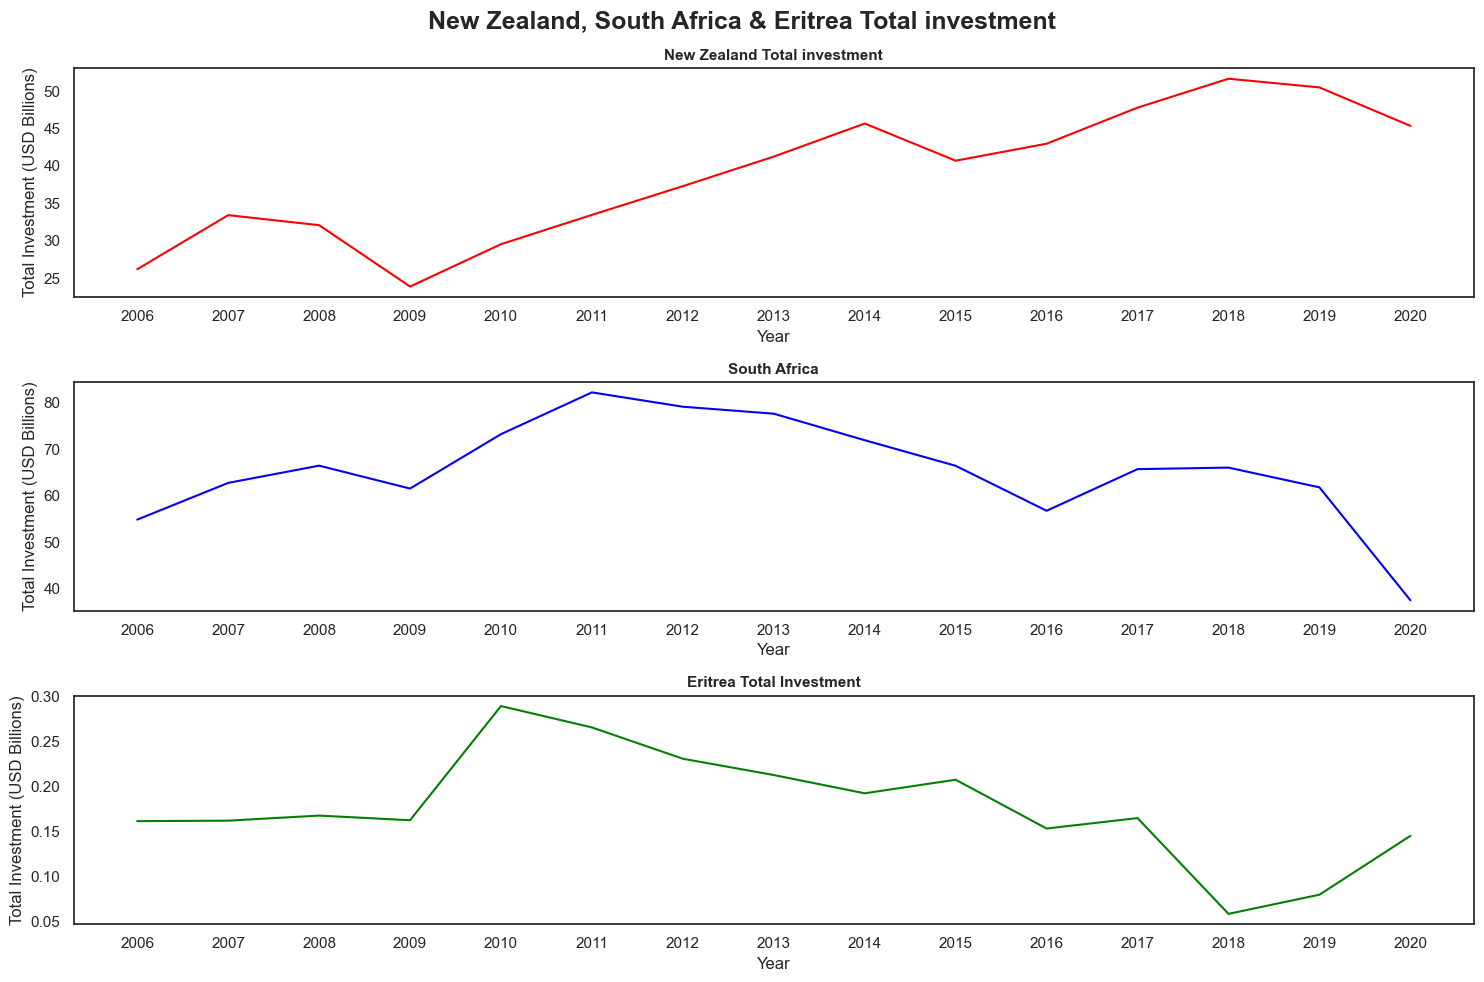

In [42]:
#Shown as small multiples Showing total investment
fig, ax = plt.subplots(3)

ax[0].plot(df_NZ_SA_ERT_total_investment['Year'], 
           df_NZ_SA_ERT_total_investment['New Zealand (Total Investment, USD Billions)'], 
           color = 'red')
ax[0].set_title('New Zealand Total investment', 
                fontsize = 11, 
                fontweight = 'bold')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Total Investment (USD Billions)')

ax[1].plot(df_NZ_SA_ERT_total_investment['Year'], 
           df_NZ_SA_ERT_total_investment['South Africa (Total Investment, USD Billions)'], 
           color = 'blue')
ax[1].set_title('South Africa', 
                fontsize = 11, 
                fontweight = 'bold')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Total Investment (USD Billions)')

ax[2].plot(df_NZ_SA_ERT_total_investment['Year'], 
           df_NZ_SA_ERT_total_investment['Eritrea (Total Investment, USD Billions)'], 
           color = 'green')
ax[2].set_title('Eritrea Total Investment', 
                fontsize = 11, 
                fontweight = 'bold')
ax[2].set_xlabel('Year')
ax[2].set_ylabel('Total Investment (USD Billions)')

plt.suptitle('New Zealand, South Africa & Eritrea Total investment', 
             fontsize = 18,
             fontweight = 'bold')

plt.tight_layout()

plt.show()


On average there seems to be a steady decline in investment for Eritrea and South Africa and an upward trend for New Zealand

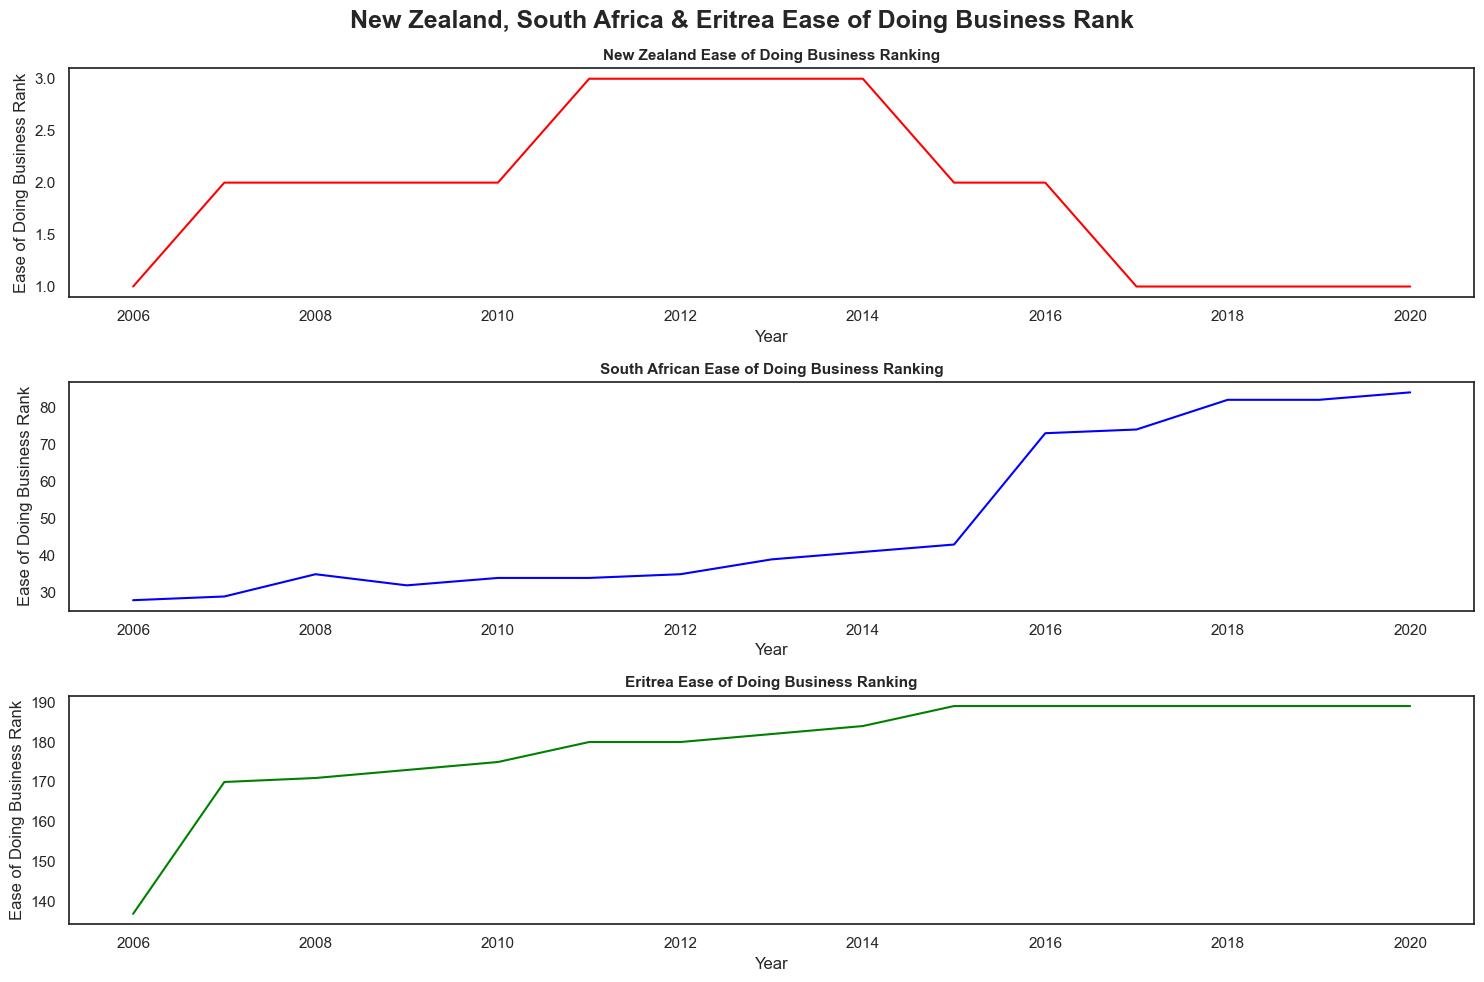

In [43]:
#Shown as small multiples Showing ease of doing business
fig, ax = plt.subplots(3)

ax[0].plot(df_ease_of_doing_biz['Year'], 
              df_ease_of_doing_biz['NewZealand: Ease of doing business index'], 
              color = 'red')
ax[0].set_title('New Zealand Ease of Doing Business Ranking', 
                   fontsize = 11, 
                   fontweight = 'bold')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Ease of Doing Business Rank')


ax[1].plot(df_ease_of_doing_biz['Year'], 
              df_ease_of_doing_biz['South Africa: Ease of doing business index'], 
              color = 'blue')
ax[1].set_title('South African Ease of Doing Business Ranking', 
                   fontsize = 11, 
                   fontweight = 'bold')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Ease of Doing Business Rank')

ax[2].plot(df_ease_of_doing_biz['Year'], 
              df_ease_of_doing_biz['Eritrea: Ease of doing business index'], 
              color = 'green')
ax[2].set_title('Eritrea Ease of Doing Business Ranking', 
                   fontsize = 11, 
                   fontweight = 'bold')
ax[2].set_xlabel('Year')
ax[2].set_ylabel('Ease of Doing Business Rank')

plt.suptitle('New Zealand, South Africa & Eritrea Ease of Doing Business Rank', 
             fontsize = 18, 
             fontweight = 'bold')

plt.tight_layout()

plt.show()

The lower the ranking the easier it is to do business
Therefore from the line graphs the ease of doing business in Eritrea and South Africa seem to getting tougher, which is in line with the declining investment.

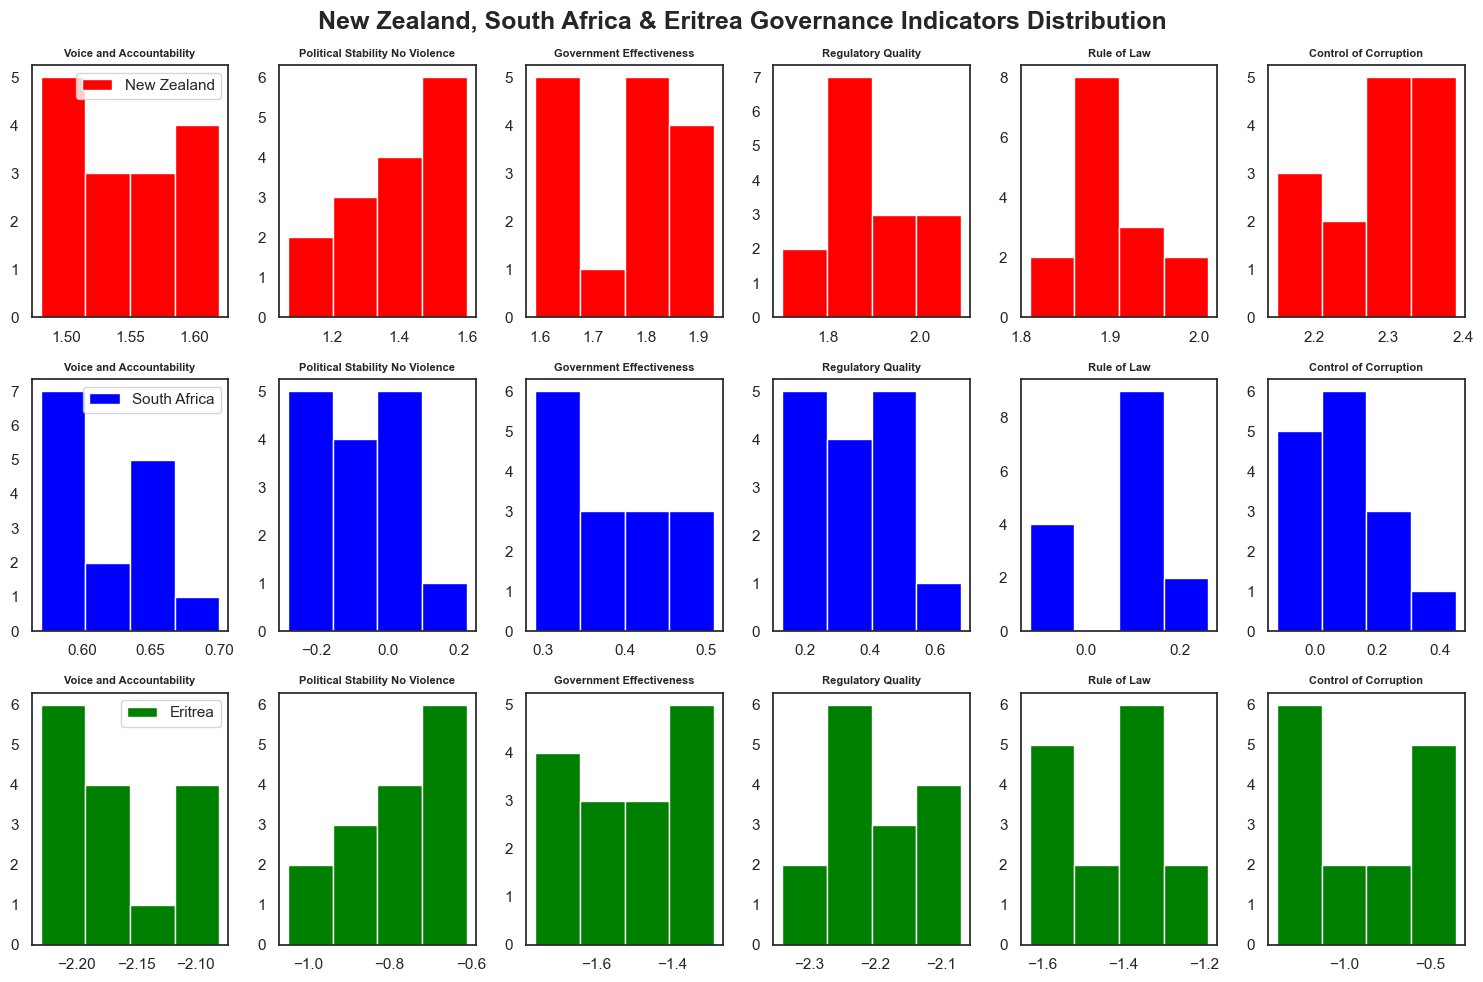

In [44]:
fig, ax = plt.subplots(3,6)

#New Zealand
ax[0, 0].hist(df_NewZealand_gov_indicators['Voice and Accountability'], 
              bins=4, 
              color = 'red')
ax[0, 0].set_title('Voice and Accountability', 
                   fontsize = 8, 
                   fontweight = 'bold')

ax[0, 1].hist(df_NewZealand_gov_indicators['Political Stability No Violence'], 
              bins=4, 
              color = 'red')
ax[0, 1].set_title('Political Stability No Violence', 
                   fontsize = 8, 
                   fontweight = 'bold')

ax[0, 2].hist(df_NewZealand_gov_indicators['Government Effectiveness'], 
              bins=4, 
              color = 'red')
ax[0, 2].set_title('Government Effectiveness', 
                   fontsize = 8, 
                   fontweight = 'bold')

ax[0, 3].hist(df_NewZealand_gov_indicators['Regulatory Quality'],
              bins=4, 
              color = 'red')
ax[0, 3].set_title('Regulatory Quality', 
                   fontsize = 8, 
                   fontweight = 'bold')

ax[0, 4].hist(df_NewZealand_gov_indicators['Rule of Law'], 
              bins=4,
              color = 'red')
ax[0, 4].set_title('Rule of Law',
                   fontsize = 8, 
                   fontweight = 'bold')

ax[0, 5].hist(df_NewZealand_gov_indicators['Control of Corruption'], 
              bins=4, 
              color = 'red')
ax[0, 5].set_title('Control of Corruption',
                   fontsize = 8,
                   fontweight = 'bold')

#South Africa
ax[1, 0].hist(df_SouthAfrica_gov_indicators['Voice and Accountability'],
              bins=4, 
              color = 'blue')
ax[1, 0].set_title('Voice and Accountability', 
                   fontsize = 8, 
                   fontweight = 'bold')

ax[1, 1].hist(df_SouthAfrica_gov_indicators['Political Stability No Violence'], 
              bins=4, 
              color = 'blue')
ax[1, 1].set_title('Political Stability No Violence', 
                   fontsize = 8, 
                   fontweight = 'bold')

ax[1, 2].hist(df_SouthAfrica_gov_indicators['Government Effectiveness'], 
              bins=4, 
              color = 'blue')
ax[1, 2].set_title('Government Effectiveness', 
                   fontsize = 8, 
                   fontweight = 'bold')

ax[1, 3].hist(df_SouthAfrica_gov_indicators['Regulatory Quality'], 
              bins=4, 
              color = 'blue')
ax[1, 3].set_title('Regulatory Quality', 
                   fontsize = 8, 
                   fontweight = 'bold')

ax[1, 4].hist(df_SouthAfrica_gov_indicators['Rule of Law'],
              bins=4, 
              color = 'blue')
ax[1, 4].set_title('Rule of Law', 
                   fontsize = 8, 
                   fontweight = 'bold')

ax[1, 5].hist(df_SouthAfrica_gov_indicators['Control of Corruption'], 
              bins=4, 
              color = 'blue')
ax[1, 5].set_title('Control of Corruption', 
                   fontsize = 8, 
                   fontweight = 'bold')

#Eritrea
ax[2, 0].hist(df_Eritrea_gov_indicators['Voice and Accountability'], 
              bins=4, 
              color = 'green')
ax[2, 0].set_title('Voice and Accountability', 
                   fontsize = 8, 
                   fontweight = 'bold')

ax[2, 1].hist(df_Eritrea_gov_indicators['Political Stability No Violence'],
              bins=4, 
              color = 'green')
ax[2, 1].set_title('Political Stability No Violence', 
                   fontsize = 8, 
                   fontweight = 'bold')

ax[2, 2].hist(df_Eritrea_gov_indicators['Government Effectiveness'], 
              bins=4,
              color = 'green')
ax[2, 2].set_title('Government Effectiveness',
                   fontsize = 8,
                   fontweight = 'bold')

ax[2, 3].hist(df_Eritrea_gov_indicators['Regulatory Quality'], 
              bins=4, 
              color = 'green')
ax[2, 3].set_title('Regulatory Quality', 
                   fontsize = 8, 
                   fontweight = 'bold')

ax[2, 4].hist(df_Eritrea_gov_indicators['Rule of Law'],
              bins=4, 
              color = 'green')
ax[2, 4].set_title('Rule of Law', 
                   fontsize = 8, 
                   fontweight = 'bold')

ax[2, 5].hist(df_Eritrea_gov_indicators['Control of Corruption'],
              bins=4, 
              color = 'green')
ax[2, 5].set_title('Control of Corruption', 
                   fontsize = 8, 
                   fontweight = 'bold')

plt.suptitle('New Zealand, South Africa & Eritrea Governance Indicators Distribution', 
             fontsize = 18, 
             fontweight = 'bold')

ax[0,0].legend(labels = ['New Zealand'])

ax[1,0].legend(labels = ['South Africa'])

ax[2,0].legend(labels = ['Eritrea'])

plt.tight_layout()

plt.show()

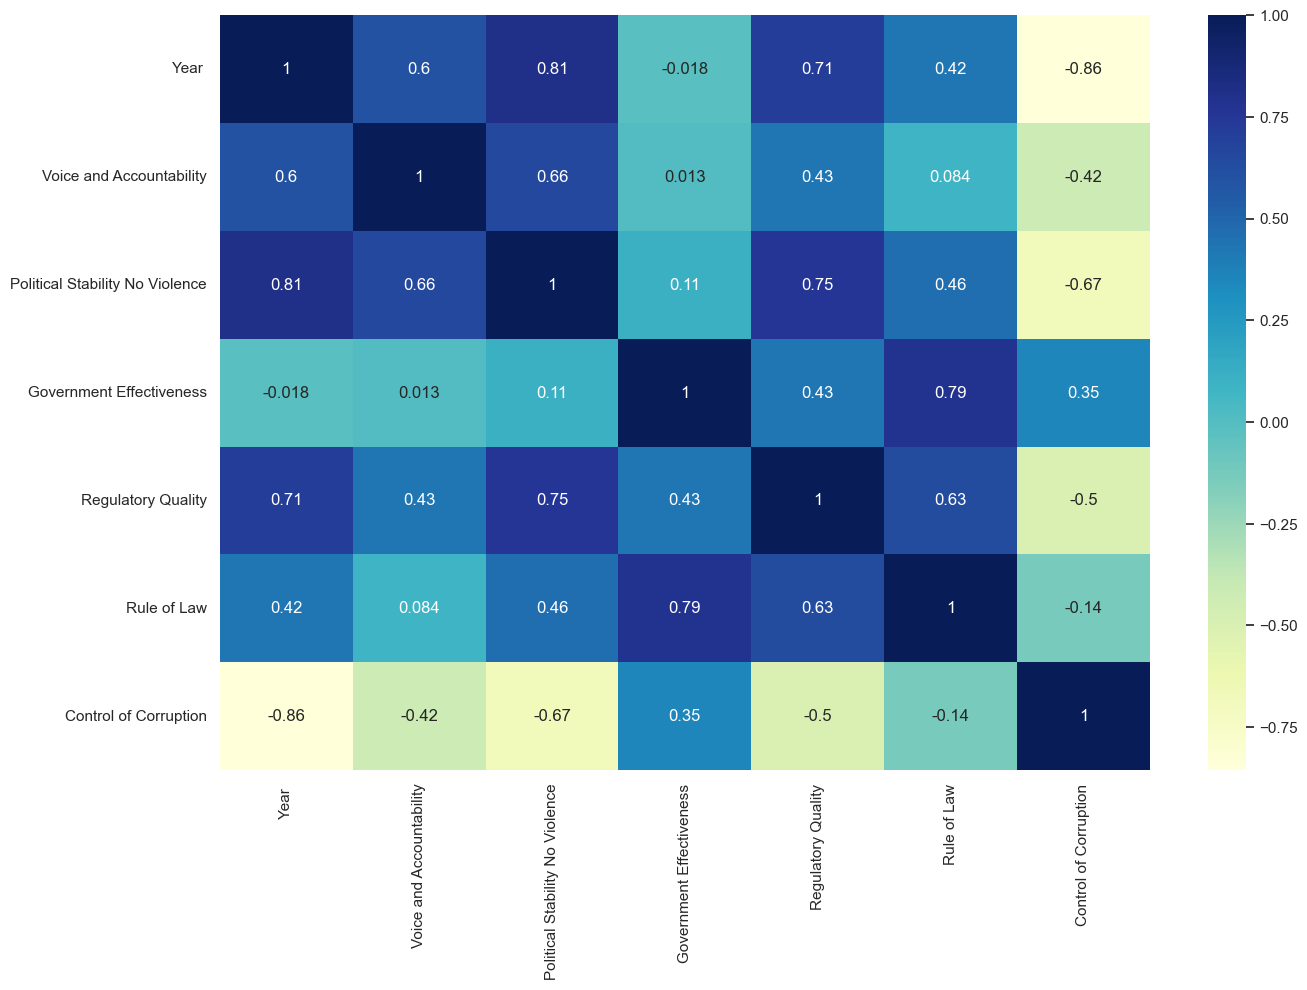

In [45]:
#Correlation heat map of governance indicators New Zealand
NZ_dataplot = sns.heatmap(df_NewZealand_gov_indicators.corr(), 
                          cmap="YlGnBu", 
                          annot=True)

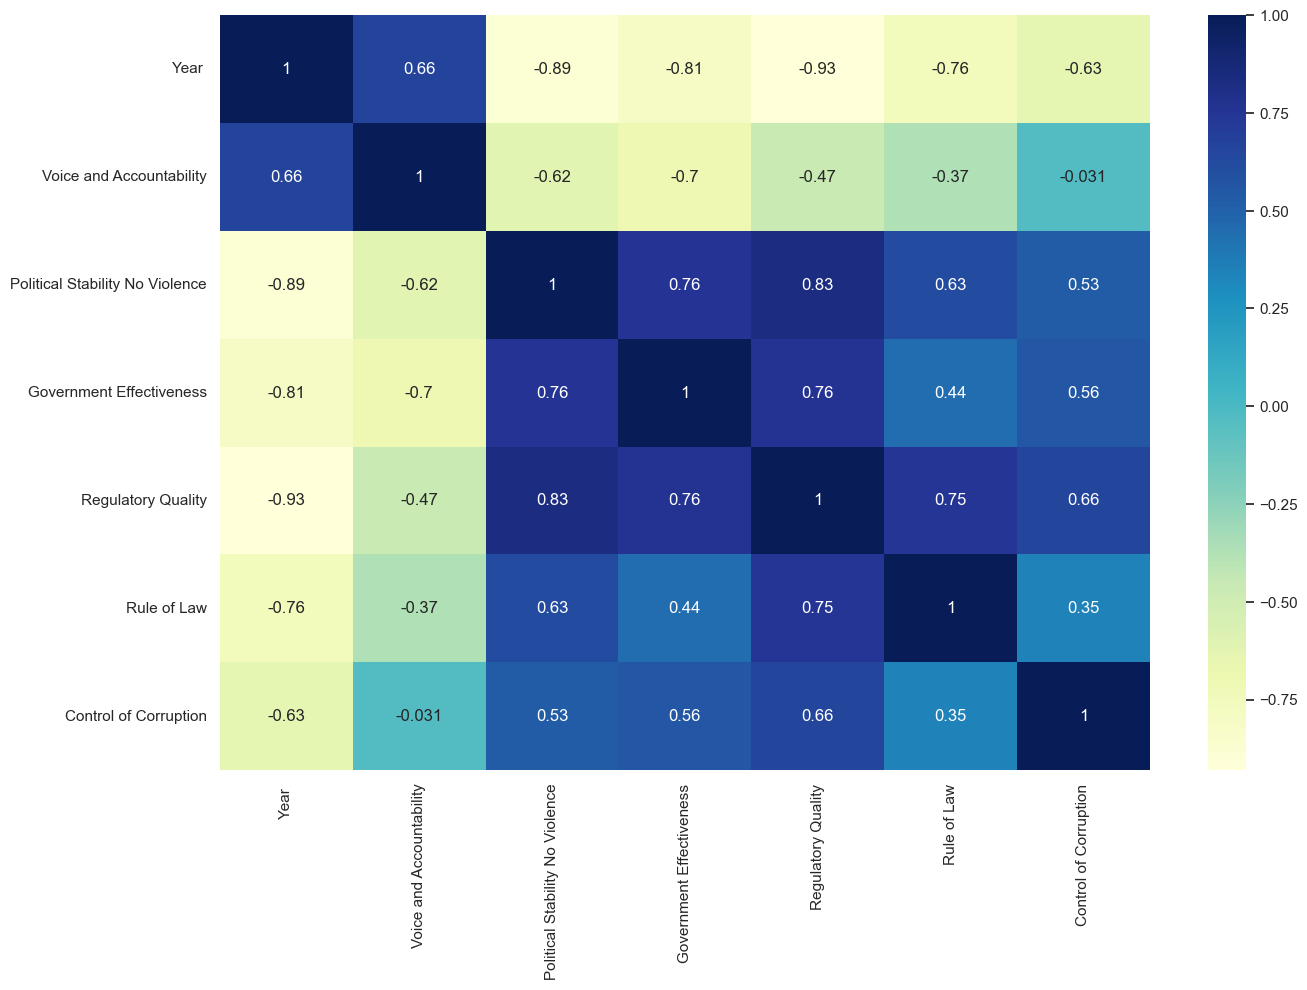

In [46]:
#Correlation heat map of governance indicators South Africa
SA_dataplot = sns.heatmap(df_SouthAfrica_gov_indicators.corr(), 
                          cmap="YlGnBu", 
                          annot=True)

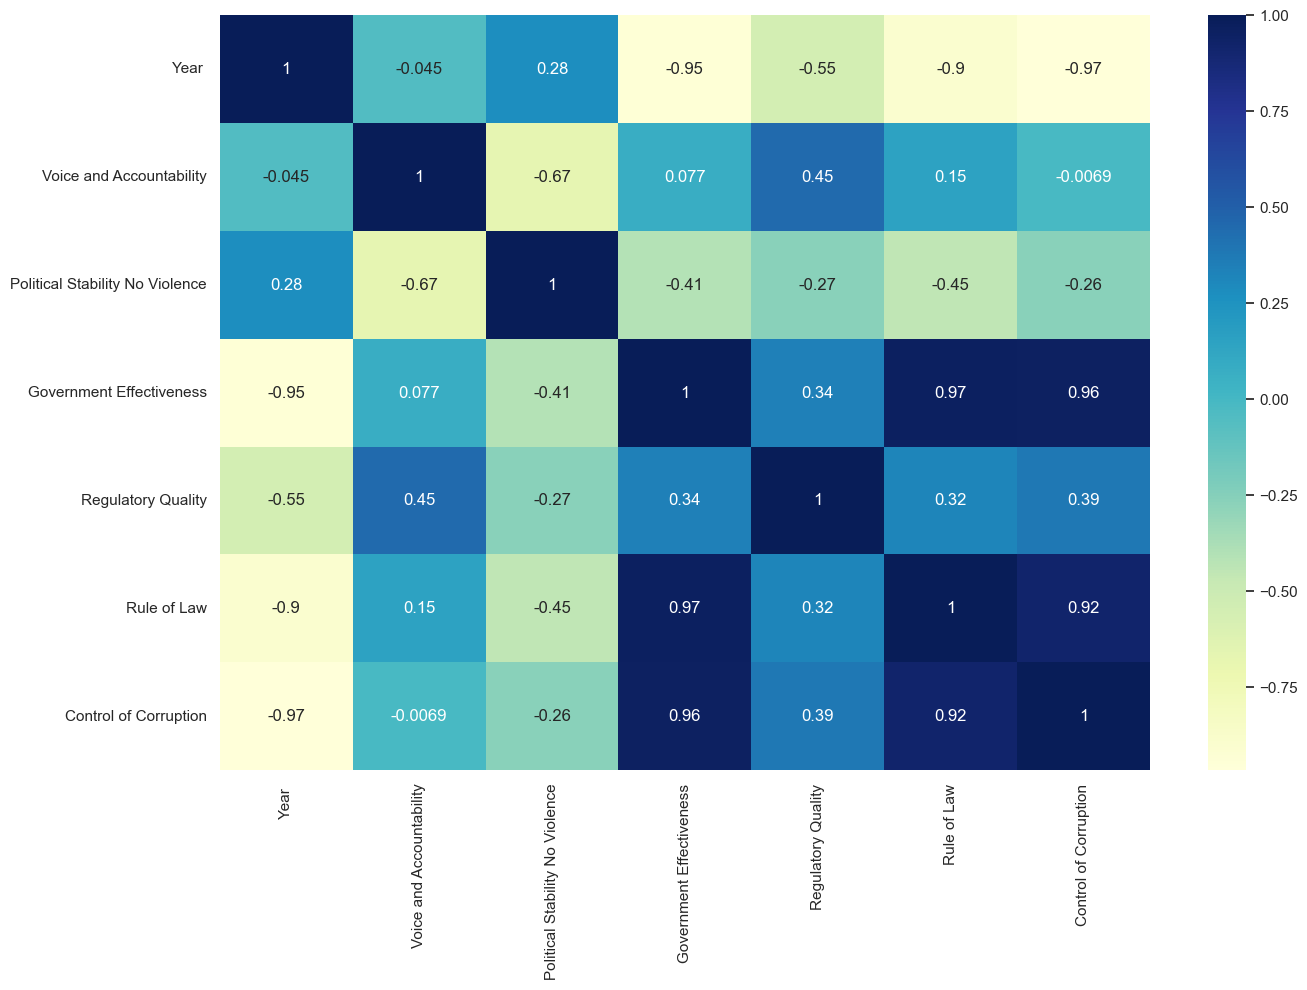

In [47]:
#Correlation heat map of governance indicators Eritrea
ERT_dataplot = sns.heatmap(df_Eritrea_gov_indicators.corr(), 
                           cmap="YlGnBu", 
                           annot=True)

# Regression Analysis

In [48]:
#Converting our data to numpy arrays
#The purpose of this is to create our independent(x) and dependent (y) variable to be used in the train test model

#Converting governace indicators to numpy arrays
nz_gov_indicator_array = df_NewZealand_gov_indicators.drop(df_NewZealand_gov_indicators.columns[0],
                                                           axis = 1)
sa_gov_indicator_array = df_SouthAfrica_gov_indicators.drop(df_SouthAfrica_gov_indicators.columns[0], 
                                                            axis = 1)
ert_gov_indicator_array = df_Eritrea_gov_indicators.drop(df_Eritrea_gov_indicators.columns[0], 
                                                         axis = 1)

#Converting ease of doing business data to numpy arrays
nz_ease_of_biz_array = df_ease_of_doing_biz['NewZealand: Ease of doing business index']
sa_ease_of_biz_array = df_ease_of_doing_biz['South Africa: Ease of doing business index']
ert_ease_of_biz_array = df_ease_of_doing_biz['Eritrea: Ease of doing business index']

#Converting total investment data to numpy arrays
nz_total_invest_array = df_NZ_SA_ERT_total_investment['New Zealand (Total Investment, USD Billions)']
sa_total_invest_array = df_NZ_SA_ERT_total_investment['South Africa (Total Investment, USD Billions)']
ert_total_invest_array = df_NZ_SA_ERT_total_investment['Eritrea (Total Investment, USD Billions)']

#Combining the governace indicator arrays by using the stack function
gov_indicator_array = np.stack((nz_gov_indicator_array,
                               sa_gov_indicator_array, 
                               ert_gov_indicator_array), 
                               axis = 1)

#Combining the ease of business arrays by using the stack function
ease_of_biz_array = np.stack((nz_ease_of_biz_array,
                              sa_ease_of_biz_array,
                              ert_ease_of_biz_array),
                              axis = 1)

#Combining the total investment arrays by using the stack function
total_investment_array = np.stack((nz_total_invest_array,
                                  sa_total_invest_array,
                                  ert_total_invest_array), axis = 1)

In [49]:
#Rshaping the governace indicator array
gov_indicator_array = gov_indicator_array.reshape(45,6)

#Reshaping the ease of doing business array
ease_of_biz_array = ease_of_biz_array.reshape(45,1)

#Reshaping the total investment array
total_investment_array = total_investment_array.reshape(45,1)

#Combining the goverance indicators and ease of doing business arrays into one using h stack function
#These will be the independent variable of the model 
gov_indicator_and_ease_of_biz = np.hstack((gov_indicator_array,ease_of_biz_array))
gov_indicator_and_ease_of_biz[:5]

array([[ 1.50e+00,  1.26e+00,  1.59e+00,  1.70e+00,  1.81e+00,  2.33e+00,
         1.00e+00],
       [ 6.50e-01,  5.00e-02,  4.40e-01,  6.80e-01,  2.60e-01,  4.50e-01,
         2.80e+01],
       [-2.08e+00, -9.00e-01, -1.30e+00, -2.07e+00, -1.19e+00, -3.50e-01,
         1.37e+02],
       [ 1.48e+00,  1.24e+00,  1.66e+00,  1.71e+00,  1.84e+00,  2.33e+00,
         2.00e+00],
       [ 5.80e-01,  2.20e-01,  4.70e-01,  4.90e-01,  9.00e-02,  2.50e-01,
         2.90e+01]])

# Train test model

In [50]:
#The independent variable
x = gov_indicator_and_ease_of_biz
#The dependent varibale
y = total_investment_array

In [51]:
# Splitting the data into two groups (training set and testing set)
# Setting the portion of the testing set to 25%
#** The train data set is used to fit the regression model, the testing data set is used to evaluate the fit of the regression model
# Random state will be set to 0 so as to reproduce the results.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [52]:
print(x_train[:5])
print(x_train.shape)

[[-2.21e+00 -7.00e-01 -1.76e+00 -2.28e+00 -1.60e+00 -1.39e+00  1.89e+02]
 [-2.08e+00 -9.00e-01 -1.30e+00 -2.07e+00 -1.19e+00 -3.50e-01  1.37e+02]
 [ 7.00e-01 -2.40e-01  3.00e-01  2.00e-01 -1.20e-01  6.00e-02  8.40e+01]
 [ 1.62e+00  1.36e+00  1.80e+00  1.85e+00  1.89e+00  2.32e+00  3.00e+00]
 [ 1.58e+00  1.38e+00  1.88e+00  1.97e+00  1.90e+00  2.30e+00  3.00e+00]]
(33, 7)


In [53]:
print(x_test[:5])
print(x_test.shape)

[[ 1.53e+00  1.52e+00  1.84e+00  2.04e+00  1.95e+00  2.28e+00  2.00e+00]
 [ 6.30e-01 -2.30e-01  3.30e-01  1.30e-01 -1.00e-01 -3.00e-02  8.20e+01]
 [ 1.55e+00  1.53e+00  1.88e+00  1.92e+00  2.00e+00  2.28e+00  2.00e+00]
 [ 5.80e-01  2.20e-01  4.70e-01  4.90e-01  9.00e-02  2.50e-01  2.90e+01]
 [ 5.70e-01 -1.10e-01  4.80e-01  4.10e-01  1.20e-01  1.80e-01  3.20e+01]]
(12, 7)


In [54]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [55]:
y_predict = model.predict(x_test)
print(y_predict)

[[41.03721962]
 [55.93021938]
 [43.22096967]
 [76.56344422]
 [72.83788119]
 [70.6553478 ]
 [66.24753174]
 [-3.86351   ]
 [ 7.83170493]
 [50.4935755 ]
 [ 5.206233  ]
 [ 0.20719264]]


In [56]:
#model intercept
model.intercept_

array([82.99710922])

In [57]:
#Model coefficients
model.coef_

array([[  5.75717075,  15.45495098,  37.25421944, -12.89861954,
        -22.47891985, -31.43064102,  -0.49935551]])

In [58]:
model.score(x_train, y_train)

0.939020291860645

In [59]:
model.score(x_test, y_test)

0.9427075916264518

The coefficient of determination is a statistical measurement that examines how differences in one variable can be explained by the difference in a second variable when predicting the outcome of a given event.

In this case, the R^2 is 94.27% meaning that 94.27 per cent of the variation in the total investment is explained by the independent variables.


In [61]:
#RooT Mean Squared Error
rmse = sqrt(mean_squared_error(y_test, y_predict))
rmse

6.912280270106583